# Homework 1

## Problem 1

The **Fundamental Plane** is an empirical relation for Elliptical galaxies. It relates two distance-independent galaxy observables, and another observable that depends on distance. Because of this,
it has been used in the past to estimate distances to galaxies. Perhaps more importantly, the fact
that this relation exists at all, is indicative of something profound about how galaxies form and
evolve.
The file **fundamental_plane.csv** contains data compiled by Djorgovski & Davis (1987) that
can be used to infer the **fundamental plane**. In specific, we will be working with the following
columns:
**log_re_pc**: logarithm of the effective radius in units of pc.
**log_sigma**: logarithm of the central velocity dispersion in units of km s−1
.
**mu**: mean surface brightness inside de effective radius in units of magnitude per square arcsecond.
We will ignore the measurement uncertainties in this problem (you can use them if you want to
be extra thorough but we will not require it for grading). We have to model $log(r_{e})$ as a linear function of $log(σ)$ and $µ$.

### 1.
Use an ordinary linear refression to model $log(r_{e})$ as a function of $log(σ)$ and $µ$.

To start this problem, the first thing that we gonna do, its to import the data contained in the csv files and plot the data.

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

#Importamos el excel con los datos
filename = 'fundamental_plane.csv'
data = pd.read_csv(filename)

#Extraemos la columnas con las que vamos a trabajar
log_re= data['log_re_pc']  #Eje Y
log_sigma= data['log_sigma']  #Variable x1
mu= data['mu']                #Variable x2
ejex=data[['log_sigma','mu']]


Now, we gonna separate the sample into a training and testing sample to do the linear regression. We want to find the coeficients of the following linear relation of the parameters:

$$ log(re)= Alog(\sigma) + B*mu $$

In [239]:
# creating train and test sets
X_train, X_test, log_re_train, log_re_test = train_test_split(ejex, log_re, test_size=0.3, random_state=42)


#Creamos objeto de regresión lineal
regression=linear_model.LinearRegression()

# Realizamos el fit al modelo
regression.fit(X_train,log_re_train)

#Hacemos las predicciones utilizando los data test 
predictions = regression.predict(X_test)

# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(log_re_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(log_re_test, predictions))

#Obtenemos los coeficientes de la regresion
A=regression.coef_[0]
B=regression.coef_[1]

Coefficients: 
 [1.10370214 0.32711211]
Mean squared error: 0.02
Coefficient of determination: 0.81


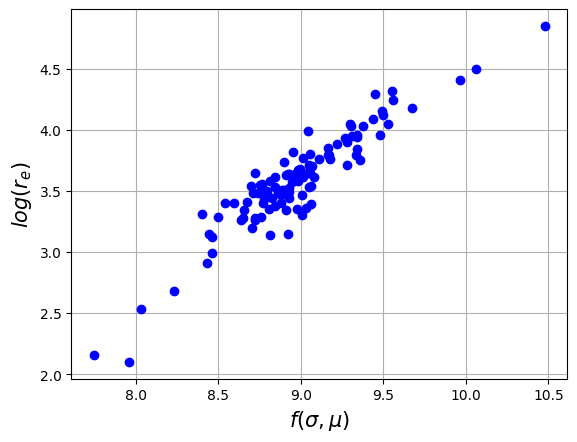

In [240]:
x= A*log_sigma + B*mu 
plt.plot(x,log_re,'bo')
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.grid()
plt.show()

Then, we gonna attemp models of increasing deegres, in particular,we will try at the 5th degree i.e. we will use a 5 polynomial functions to make the fit, this function are:
$$ f_{1}(x)= a + bx$$
$$ f_{2}(x)= a + bx + cx^2$$
$$ f_{3}(x)= a + bx + cx^2 + dx^3$$
$$ f_{4}(x)= a + bx + cx^2 + dx^3 + ex^4$$
$$ f_{5}(x)= a + bx + cx^2 +dx^3 +ex^4 + mx^5$$

To make this we gonna use the function called PolynomialFeatures from sklearn and then we will plot each polynomial fit.

In [242]:
#Importamos las librerias a utilizar
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


#### $1^{st}$ degree polinomyal model 

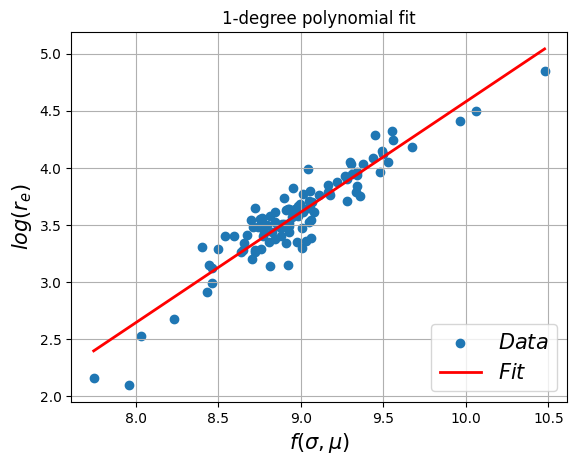

In [258]:
xarray=np.array(x)
poly = PolynomialFeatures(degree=1, include_bias=False)
#hacemos un reshape al polynomio para utilizar sklearn
poly_features_1= poly.fit_transform(xarray.reshape(-1, 1))

#Realizamos ajusto con modelo lineal
poly_reg_model_1 = LinearRegression()
poly_reg_model_1.fit(poly_features_1, log_re)
model_1= poly_reg_model_1.fit(poly_features_1, log_re)
 
constant=poly_reg_model_1.intercept_
coef= poly_reg_model_1.coef_
y_predicted_1 = poly_reg_model_1.predict(poly_features_1)

    
#Procedemos a plotear
# Combinamos los dos arrays en una lista de pares ordenados
pares_ordenados = list(zip(xarray, y_predicted_1))

# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

#Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

#create scatterplot of x vs. y
plt.scatter(xarray, log_re)

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.title('1-degree polynomial fit')
plt.legend(['$Data}$','$Fit$'],loc='lower right',fontsize=15)
plt.grid()
plt.show()



#### $2^{nd}$ degree polinomyal model

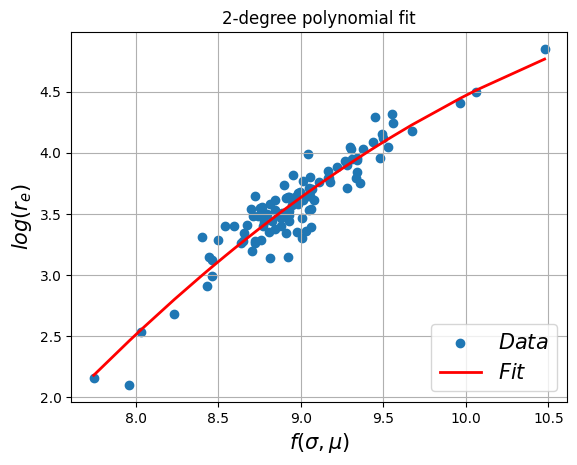

In [259]:
xarray=np.array(x)
poly = PolynomialFeatures(degree=2, include_bias=False)
#hacemos un reshape al polynomio para utilizar sklearn
poly_features_2 = poly.fit_transform(xarray.reshape(-1, 1))

#Realizamos ajusto con modelo lineal
poly_reg_model_2 = LinearRegression()
poly_reg_model_2.fit(poly_features_2, log_re)
constant=poly_reg_model_2.intercept_
coef= poly_reg_model_2.coef_
y_predicted_2 = poly_reg_model_2.predict(poly_features_2)

    
#Procedemos a plotear
# Combinamos los dos arrays en una lista de pares ordenados
pares_ordenados = list(zip(xarray, y_predicted_2))

# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

#Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

#create scatterplot of x vs. y
plt.scatter(xarray, log_re)

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.title('2-degree polynomial fit')
plt.legend(['$Data}$','$Fit$'],loc='lower right',fontsize=15)
plt.grid()
plt.show()


#### $3^{rd}$ degree polinomyal model

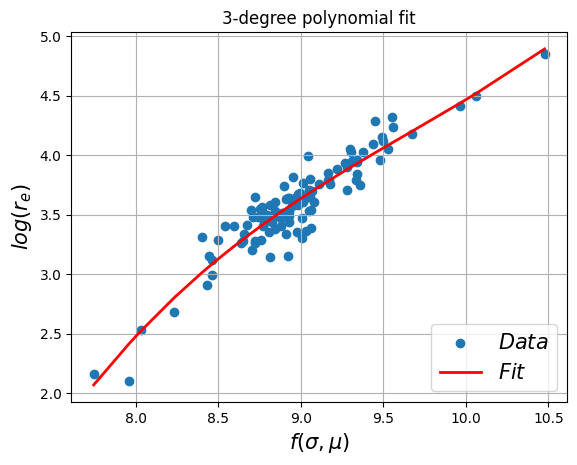

In [260]:
xarray=np.array(x)
poly = PolynomialFeatures(degree=3, include_bias=False)
#hacemos un reshape al polynomio para utilizar sklearn
poly_features_3 = poly.fit_transform(xarray.reshape(-1, 1))

#Realizamos ajusto con modelo lineal
poly_reg_model_3 = LinearRegression()
poly_reg_model_3.fit(poly_features_3, log_re)
constant=poly_reg_model_3.intercept_
coef= poly_reg_model_3.coef_
y_predicted_3 = poly_reg_model_3.predict(poly_features_3)

    
#Procedemos a plotear
# Combinamos los dos arrays en una lista de pares ordenados
pares_ordenados = list(zip(xarray, y_predicted_3))

# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

#Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

#create scatterplot of x vs. y
plt.scatter(xarray, log_re)

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.title('3-degree polynomial fit')
plt.legend(['$Data}$','$Fit$'],loc='lower right',fontsize=15)
plt.grid()
plt.show()
    


#### $4^{th}$ degree polinomyal model

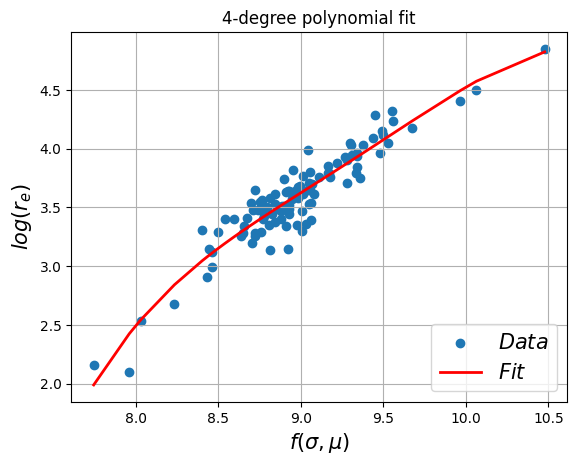

In [261]:
xarray=np.array(x)
poly = PolynomialFeatures(degree=4, include_bias=False)
#hacemos un reshape al polynomio para utilizar sklearn
poly_features_4= poly.fit_transform(xarray.reshape(-1, 1))

#Realizamos ajusto con modelo lineal
poly_reg_model_4 = LinearRegression()
poly_reg_model_4.fit(poly_features_4, log_re)
constant=poly_reg_model_4.intercept_
coef= poly_reg_model_4.coef_
y_predicted_4 = poly_reg_model_4.predict(poly_features_4)

    
#Procedemos a plotear
# Combinamos los dos arrays en una lista de pares ordenados
pares_ordenados = list(zip(xarray, y_predicted_4))

# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

#Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

#create scatterplot of x vs. y
plt.scatter(xarray, log_re)

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.title('4-degree polynomial fit')
plt.legend(['$Data}$','$Fit$'],loc='lower right',fontsize=15)
plt.grid()
plt.show()
    
       

#### $5^{th}$ degree polinomyal model

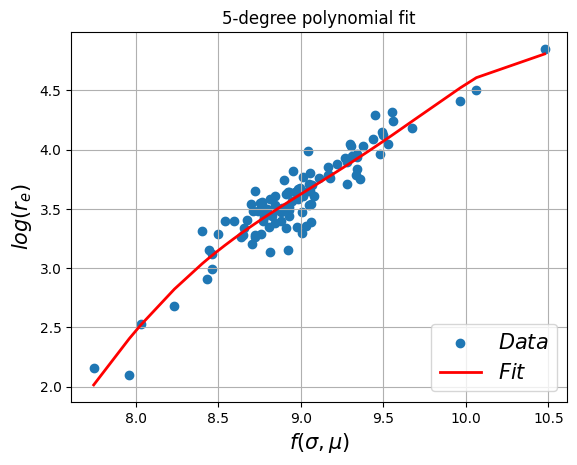

In [262]:
xarray=np.array(x)
poly = PolynomialFeatures(degree=5, include_bias=False)
#hacemos un reshape al polynomio para utilizar sklearn
poly_features_5= poly.fit_transform(xarray.reshape(-1, 1))

#Realizamos ajusto con modelo lineal
poly_reg_model_5 = LinearRegression()
poly_reg_model_5.fit(poly_features_5, log_re)
constant=poly_reg_model_5.intercept_
coef= poly_reg_model_5.coef_
y_predicted_5 = poly_reg_model_5.predict(poly_features_5)

    
#Procedemos a plotear
# Combinamos los dos arrays en una lista de pares ordenados
pares_ordenados = list(zip(xarray, y_predicted_5))

# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

#Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

#create scatterplot of x vs. y
plt.scatter(xarray, log_re)

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
plt.xlabel('$f(\sigma,\mu)$',fontsize=15)
plt.ylabel('$log(r_{e})$',fontsize=15)
plt.title('5-degree polynomial fit')
plt.legend(['$Data}$','$Fit$'],loc='lower right',fontsize=15)
plt.grid()
plt.show()
 
  

Finally, we gonna plot all the models together.

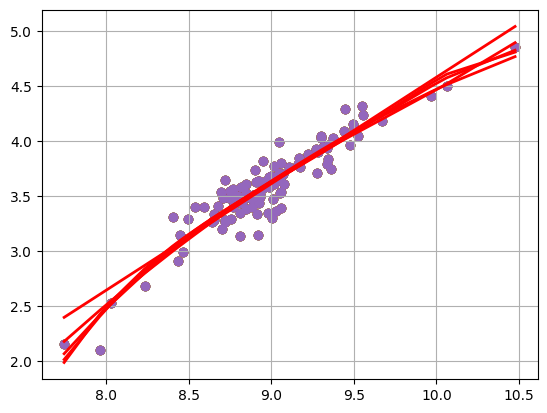

In [10]:
#Hacemos array con los grados del fit y los coeficientes de la regresion
degrees=[1,2,3,4,5]
coeficientes=[]
constantes=[]
xarray=np.array(x)

for i in degrees:
    
    poly = PolynomialFeatures(degree=i, include_bias=False)

    #reshape data to work properly with sklearn
    poly_features = poly.fit_transform(xarray.reshape(-1, 1))

    #fit polynomial regression model
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, log_re)
    constant=poly_reg_model.intercept_
    coef= poly_reg_model.coef_
    constantes.append(constant)
    coeficientes.append(coef)
    #display model coefficients
    #print(poly_reg_model.intercept_, poly_reg_model.coef_)
    y_predicted = poly_reg_model.predict(poly_features)

    
    #Procedemos a plotear
    # Combinamos los dos arrays en una lista de pares ordenados
    pares_ordenados = list(zip(xarray, y_predicted))

    # Ordenar los pares ordenados por el primer array
    pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])

    #Separamos los array
    x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

    #create scatterplot of x vs. y
    plt.scatter(xarray, log_re)

    #add line to show fitted polynomial regression model
    plt.plot(x_ordenado, y_ordenado, 'r',linewidth=2)
    plt.grid()
    
    


Now we have to make us a question, what model its better?, in particular we want to avoid the overfitting. Thats why we will make a crossvalidation

Cross validation consist in make diferents partitions of the data in a lot of folds when we can do the train and test sample a image that can ilustrate this its:

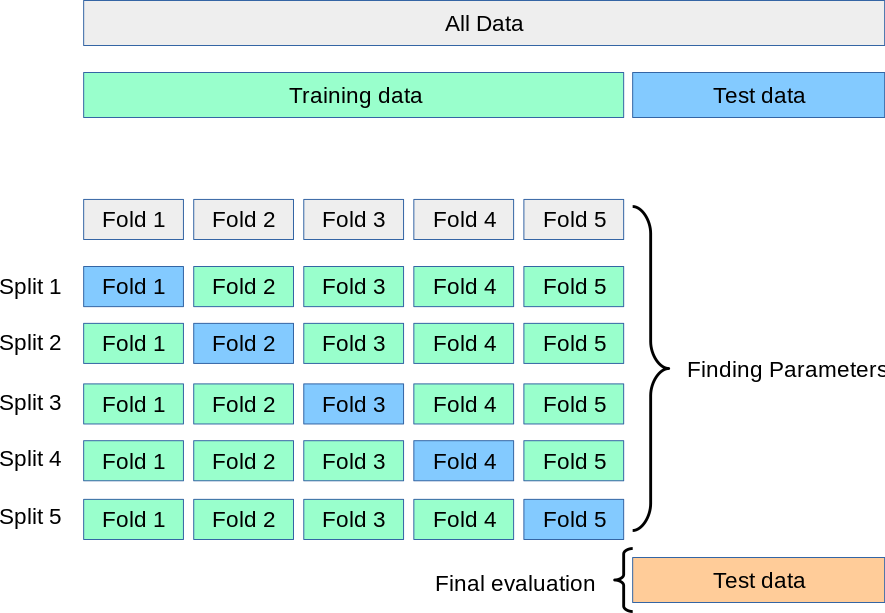!

In [11]:
from sklearn.model_selection import KFold, cross_val_score

#Lo primero que haremos, será separar nuestros datos en keyfolds, para esto
#recordemos que nombramos las regresiones lineales como poly_reg_model_x con x el grado del polinomio a fitear
#Realizamos 5 splits
folds = KFold(n_splits = 25, shuffle = True, random_state = 7)

sc_1= cross_val_score(poly_reg_model_1, poly_features_1, log_re, scoring='r2', cv=10)
sc_2= cross_val_score(poly_reg_model_2, poly_features_2, log_re, scoring='r2', cv=10)
sc_3= cross_val_score(poly_reg_model_3, poly_features_3, log_re, scoring='r2', cv=10)
sc_4= cross_val_score(poly_reg_model_4, poly_features_4, log_re, scoring='r2', cv=10)
sc_5= cross_val_score(poly_reg_model_5, poly_features_5, log_re, scoring='r2', cv=10)


0.7633702123589073
0.7656207877317778
0.7671568842077315
0.7536056259747848
0.21706144053283327


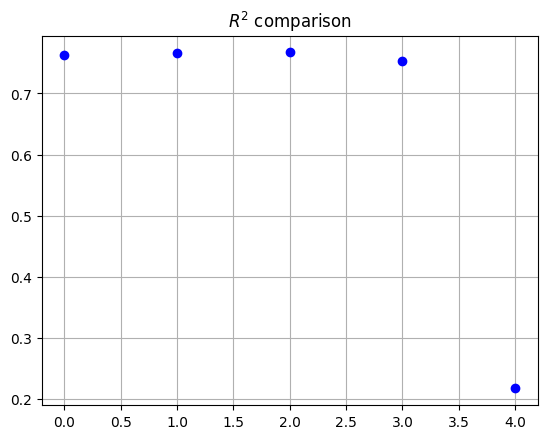

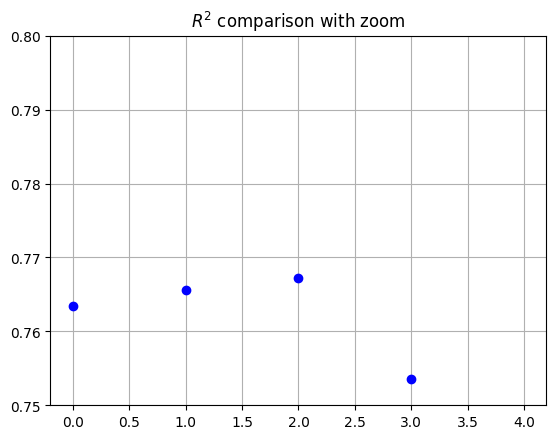

In [12]:
#ploteamos para comparar modelos

sc_list=[np.mean(sc_1),np.mean(sc_2),np.mean(sc_3),np.mean(sc_4),np.mean(sc_5)]
print(np.mean(sc_1))
print(np.mean(sc_2))
print(np.mean(sc_3))
print(np.mean(sc_4))
print(np.mean(sc_5))
plt.plot(sc_list, 'bo')
plt.title('$R^2$ comparison')
plt.grid()
plt.show()
plt.plot(sc_list,'bo')
plt.grid()
plt.title('$R^2$ comparison with zoom')
plt.ylim(0.75,0.8)
plt.show()

To decide what model is the better, we use the parameter called $R^2$ and this its optimum when $R^2=1$. Then with the previus results, we can see that the best models are the 3 first one, i.e. the linear, cuadratic and cubic polynomials are a good fit for our problem, because they have mostly the same $R^2$

### 2
Now stick to a first degree linear model and perform a Lasso regression and a Ridge regression.
Take a look at the coefficients of the linear fits. Can you explain the differences?

#### Lasso Regression

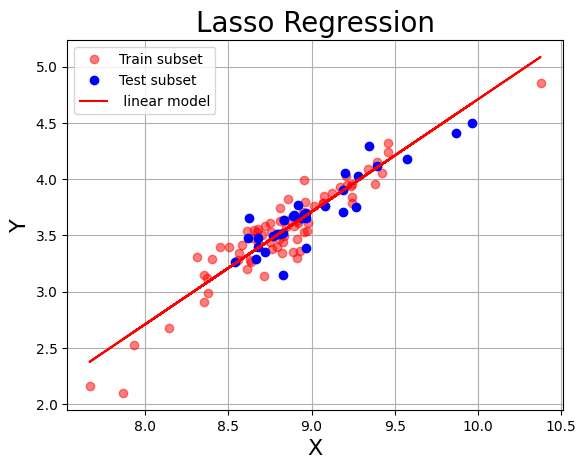

The coeficient A with Lasso regression is: 1.0684057452663043
The coeficient B with Lasso regression is: 0.3265447921236918


In [13]:

from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(X_train,log_re_train)

A_lasso=lasso_reg.coef_[0]
B_lasso=lasso_reg.coef_[1]
lasso_predict= lasso_reg.predict(X_test)
z=A_lasso*log_sigma+B_lasso*mu

X_train1=X_train['log_sigma']
X_train2=X_train['mu']

X_test1=X_test['log_sigma']
X_test2=X_test['mu']

z_train=A_lasso*X_train1 + B_lasso*X_train2
z_test=A_lasso*X_test1 + B_lasso*X_test2

#plt.plot(z,log_re,'bo')
plt.plot(z_train, log_re_train, 'ro', alpha=0.5, label = 'Train subset')
plt.plot(z_test, log_re_test, 'bo', label = 'Test subset')
plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
#plt.grid()
plt.title('Lasso Regression', size=20)
fitx=A_lasso*log_sigma + B_lasso*mu
total_predict=lasso_reg.predict(ejex)
#plt.plot(z_test,predictions,'r')
plt.plot(fitx,total_predict,'r', label= ' linear model')

plt.legend()
plt.grid()
plt.show()

#printeamos las constantes A y B obtenidas
print('The coeficient A with Lasso regression is: ' + str(A_lasso))
print('The coeficient B with Lasso regression is: ' + str(B_lasso))

#### Ridge Regresion

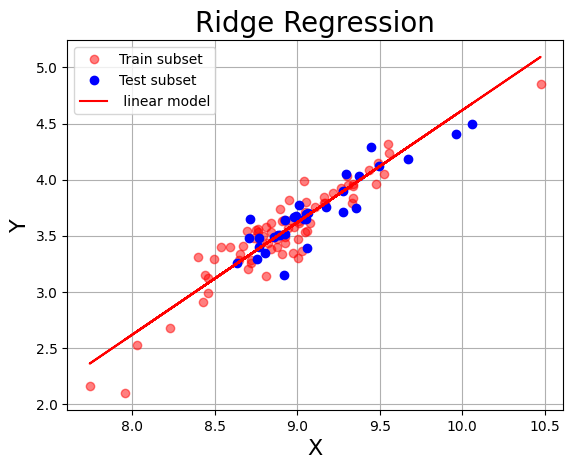

The coeficient A with Lasso regression is: 1.1031723638440045
The coeficient B with Lasso regression is: 0.3271131936128491


In [14]:
from sklearn import linear_model
# Definition of the ridge cv model
ridge_reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
#realizamos el fit 
ridge_reg.fit(X_train, log_re_train)

# buscamos el alfa óptimo para realizar la ridge regresion
alpha=ridge_reg.alpha_

A_ridge=ridge_reg.coef_[0]
B_ridge=ridge_reg.coef_[1]
ridge_predict= ridge_reg.predict(X_test)
z=A_ridge*log_sigma+B_ridge*mu

z_train_rid=A_ridge*X_train1 + B_ridge*X_train2
z_test_rid=A_ridge*X_test1 + B_ridge*X_test2

#plt.plot(z,log_re,'bo')
plt.plot(z_train_rid, log_re_train, 'ro', alpha=0.5, label = 'Train subset')
plt.plot(z_test_rid, log_re_test, 'bo', label = 'Test subset')
plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
#plt.grid()
plt.title('Ridge Regression', size=20)
fitx=A_ridge*log_sigma + B_ridge*mu
total_predict=ridge_reg.predict(ejex)
#plt.plot(z_test,predictions,'r')
plt.plot(fitx,total_predict,'r', label= ' linear model')

plt.legend()
plt.grid()
plt.show()

#printeamos las constantes A y B obtenidas
print('The coeficient A with Lasso regression is: ' + str(A_ridge))
print('The coeficient B with Lasso regression is: ' + str(B_ridge))

Finally, we find that the coeficients obtained with Lisso and Ridge regression are:

|                            | A     | B     |
|----------------------------|-------|-------|
| Ordinary Linear regression | 1.104 | 0.327 |
| Lasso regression           | 1.069 | 0.326 |
| Ridge regression           | 1.103 | 0.327 |

We can see that the 3 methods give us a similar coeficients A and B. The diferences in the coeficients obtained its related to how it works the methods.
The diferences are that in Lasso regression, we are already considering the problem of overfitting and in Ridge regression its used to reduce the variance of the linear regression, both are useful but its function is not the same.

### 3
The data set may contain one or two outliers. Perform a Hubber loss regression (Why?). How
did you choose the hyper-parameter? How does it compare to the regressions done before?

#### Huber Regresion

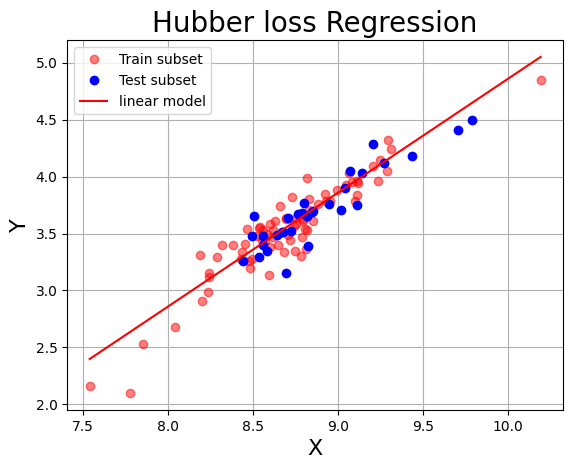

The coeficient A with Lasso regression is: 1.1386376712135946
The coeficient B with Lasso regression is: 0.31149841432479797


In [15]:
from sklearn.linear_model import HuberRegressor
#Definimos el modelo huberloss
hubber_reg = linear_model.HuberRegressor(epsilon=1.1, max_iter=150)
hubber_reg.fit(X_train, log_re_train)

A_hubber=hubber_reg.coef_[0]
B_hubber=hubber_reg.coef_[1]

hubber_predict= hubber_reg.predict(X_test)
z=A_hubber*log_sigma+B_hubber*mu

z_train_hub=A_hubber*X_train1 + B_hubber*X_train2
z_test_hub=A_hubber*X_test1 + B_hubber*X_test2

#plt.plot(z,log_re,'bo')
plt.plot(z_train_hub, log_re_train, 'ro', alpha=0.5, label = 'Train subset')
plt.plot(z_test_hub, log_re_test, 'bo', label = 'Test subset')
plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
#plt.grid()
plt.title('Hubber loss Regression', size=20)
fitx=A_hubber*log_sigma + B_hubber*mu
total_predict=hubber_reg.predict(ejex)
pares_ordenados = list(zip(fitx, total_predict))
# Ordenar los pares ordenados por el primer array
pares_ordenados_ordenados = sorted(pares_ordenados, key=lambda x: x[0])
 #Separamos los array
x_ordenado, y_ordenado = zip(*pares_ordenados_ordenados)

    

#add line to show fitted polynomial regression model
plt.plot(x_ordenado, y_ordenado, 'r',label='linear model')

#plt.plot(fitx,total_predict,'y', label= ' linear model')

plt.legend()
plt.grid()
plt.show()


#printeamos las constantes A y B obtenidas
print('The coeficient A with Lasso regression is: ' + str(A_hubber))
print('The coeficient B with Lasso regression is: ' + str(B_hubber))

Summary of all the coeficient A and B obtained:

|                            | A        | B        |
|----------------------------|----------|----------|
| Ordinary Linear regression | 1.104    | 0.327    |
| Lasso regression           | 1.069    | 0.326    |
| RIdge regression           | 1.103    | 0.327    |
| Hubber loss                | 1.139    | 0.311    |



Again, we obtained a coeficients A and B very close to the other regression, in this time we have note that the differences in the coeficients respect to the others methods of linear regression are beacause when we do a hubber loss, the method are only considering de inliers, the outliers are not useful for our regression, for do that, we impose a parameter $\epsilon = 1.35$ to say to the model that only consider the data that its greater than $\epsilon$ for make the regression. We choose $\epsilon = 1.35$ because this parameter is the Treshold, and we want to achieve a 95% stadistical efficiency. 

why we use the hubber loss?, we use this method to eliminate the outliers, because dont represent an estadistical information of our problem, and this introduce error in our problem. In this case, we can note that the outliers change the value of A and B respect to the parameters A and B obtained with the others methods, because the other methods are considering the outliers.

 

## Problem 2

The file M_sigma.csv, contains the data used by Harris et al. (2013). The data corresponds
to estimates of M•: the mass of the supermassive black hole in the center of a galaxy, in units of
$M_{o}$ = 2 × 1033 g; and σ: the velocity dispersion of the stars in the bulge of those same galaxies, in
units of σ0 = 200 km s−1. The data was used by Harris et al. (2013) to explore the so called M•–σ
relation, a very important observational constraint that relates the properties of the supermassive
black hole in the center of a galaxy (a parsec sized region) with the global potential of the galaxy
(on kiloparsec scales...–by the way, in case you are looking for an interesting scientific project, it is
not understood how such a correlation arises). Here you will use the same data to derive the M•–σ
relation yourself. The linear relation to fit has the following shape:

$$ log\left(\frac{M•}{M_{o}}\right) = \alpha + \beta log\left(\frac{\sigma}{\sigma_{o}}\right) + N(0,w^2)$$

In the above expression, $N (0, w^2
)$ represents the intrinsic scatter of the relation, assumed to be
gaussian and constant, parametrized by w.

We begin this problem importing the data and the librarys

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import emcee
from scipy.stats import norm
from scipy import stats
import random as rd
rd.seed(7)

In [266]:
#Importamos excel con los datos
filename='M_sigma.csv'
data=data = pd.read_csv(filename)
log_sigma= data['logSigma'] #Eje X
err_log_sigma= data['err_logSigma'] #error en x
log_M= data['logM'] #Eje Y
err_logM= data['err_logM'] #Error en y


We already import the data, for visualizate, we will plot it.

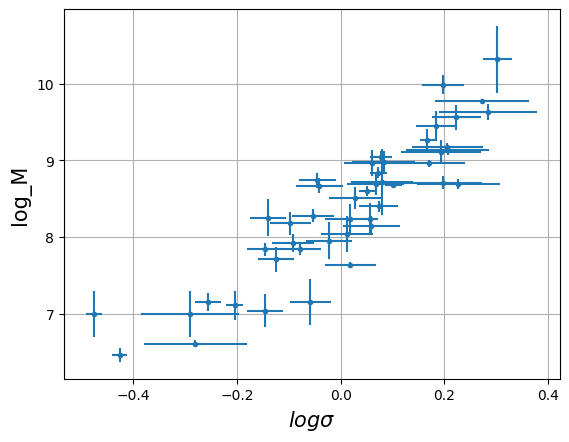

In [267]:
#ploteamos los datos para tener una referencia
#plt.figure(figsize=(8,6))
plt.errorbar(log_sigma,log_M,xerr=err_log_sigma,yerr=err_logM,fmt='.')
plt.xlabel('$log\sigma$',fontsize=15)
plt.ylabel('log_M',fontsize=15)

plt.grid()

Now, we will define the model that relates the variables. For this, we use the following model:

$$ log\left(M•\right) = \alpha + \beta log\left(\sigma\right) + N(0,w^2) $$

Note that the terms $logM_{o}$ and $log \sigma_o$ was absorbed by the constants $\alpha$ and $\beta$

For construct the prior, we will put initial conditions closely to the correct parameters we see this testing manually the model.
Then, for the likelihood, we use that the log-likelihood its defined in this way:

$$ log(L(\Theta)=l(\Theta)= \sum log( f(\sigma,a,b,w))$$

In [268]:
#definimos modelo
def f(sigma,a,b,w):
    #sigma= log_sigma
    y=a + b*sigma + norm.rvs(loc=0, scale= w, random_state=7)
    return y

#Definimos el prior
def ln_prior(theta):

    a, b, w, Pb, Yb, logVb = theta
    if 2 < a < 8 and 2 < b < 10 and 0.01 < w < 4 and 0 < Pb < 1 and 0 < Yb < 1000 and -2 < logVb < 10:
        return 0
    return -np.inf

#Definimos nuestra funcion likelihood
def ln_likelihood(theta,x,y,yerr):
    
    a, b, w, Pb, Yb, logVb = theta
    Vb = 10**logVb
    model = f(x,a,b,w)
    p_fg = (1-Pb) / np.sqrt(2 * np.pi * yerr**2) * np.exp(-(y-model)**2/(2 * yerr**2))
    p_bg = Pb / np.sqrt(2 * np.pi * (Vb + yerr**2)) * np.exp(-(y - Yb)**2/(2 * (Vb + yerr**2)))
    output = np.sum(np.log(p_fg + p_bg))
    
    return output

#Ahora, definimos el posterior
def ln_posterior(theta, x, y, yerr):
    ln_p = ln_prior(theta)
    if not np.isfinite(ln_p):
        return -np.inf
    return ln_p + ln_likelihood(theta, x, y, yerr)



theta_0 = np.array([5, 4,0.1,0.003, 400, 1.])

ndim, nwalkers = 6, 500
#pos_0 = [theta_0 + [0.01,0.1,0.1,0.01,10,1]*np.random.randn(ndim) for i in range(nwalkers)]

pos_0 = [theta_0 + [0.001,0.001,0.01,0.001,10,1]*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, 
                                args=(log_sigma,log_M, err_logM), threads=8)


n_steps = 1000

In [ ]:
%timeit -n1 -r1 sampler.run_mcmc(pos_0, n_steps,store=True,progress=True);

C:\Users\josem\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\josem\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
 62%|██████▏   | 617/1000 [09:20<05:26,  1.17it/s]

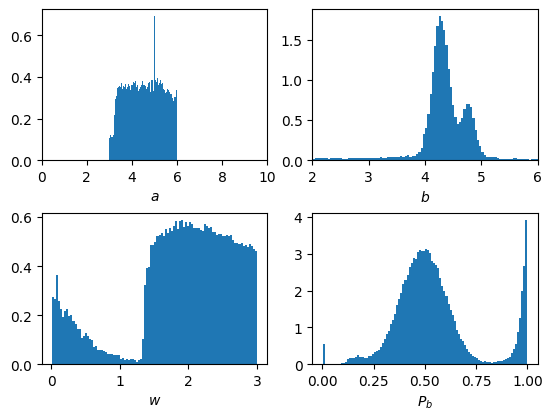

In [172]:
H, xedges, yedges = np.histogram2d(sampler.flatchain[:,0], 
                                   sampler.flatchain[:,1], bins=50)
X, Y = np.meshgrid(xedges, yedges)
n_trim = int(nwalkers * n_steps / 10)

with plt.style.context('default'):
    
    plt.subplot(221)
    plt.hist(sampler.flatchain[n_trim:,0], bins=200, density=True)
    plt.xlim(0,10)
    plt.xlabel('$a$')
    
    plt.subplot(222)
    plt.hist(sampler.flatchain[n_trim:,1], bins=200, density=True)
    plt.xlabel('$b$')
    plt.xlim(2,6)
    
    plt.subplot(223)
    plt.hist(sampler.flatchain[n_trim:,2], bins=100, density=True)
    plt.xlabel('$w$')

    plt.subplot(224)
    plt.hist(sampler.flatchain[n_trim:,3], bins=100, density=True)
    plt.xlabel('$P_b$')
    
    plt.subplots_adjust(top=0.85, hspace=0.35)

whit this plots, we can see that the parameter b are well-defined, but the parameters a and w have more uncertainties, beacause they have degeneracy, however, we gonna see the fit to evaluate how good it was the bayesian analysis.

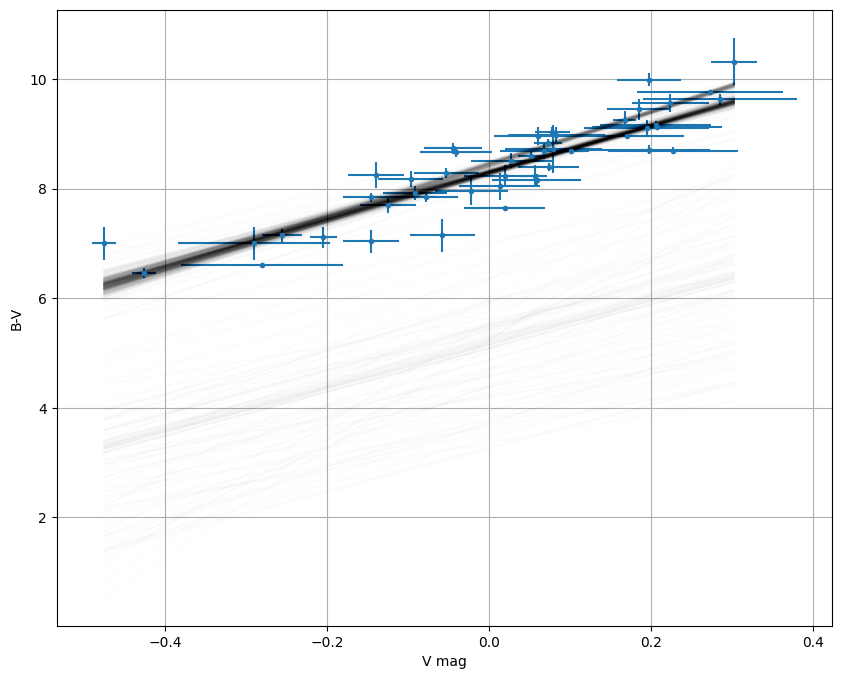

In [173]:
plt.figure(figsize=(10,8))
plt.errorbar(log_sigma,log_M,yerr=err_logM,xerr=err_log_sigma,fmt='.')

x_to_plot = np.linspace(min(log_sigma), max(log_sigma), 50)
                        
for i in np.random.randint(0, high=len(sampler.flatchain), size=500):
    a, b,w = sampler.flatchain[i, [0, 1, 2]]
    plt.plot(x_to_plot,f(x_to_plot,a,b,w) , color='k', alpha=0.01)
           

plt.xlabel('V mag')
plt.ylabel('B-V')
plt.grid()
#plt.ylim(-0.5, 1.5)

We can see that the bayesian analysis, it works for the problem, because the data have a good fit. Also 

Now, we will make the corner plots to see the relation with the diferent parameters

In [174]:
import corner

fig = corner.corner(sampler.flatchain[n_trim:,[0, 1, 2,3]], 
                    labels=["$a$", "$b$",'w', "$P_b$"], 
                    range=(0.9, 0.9, 0.9,0.9),
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_kwargs={"fontsize": 12})

NameError: name 'sampler' is not defined

then, the parameters obtained with the bayesian analisys and his respective desviation are :
|                            | Estimate | Error |
|----------------------------|----------|-------|
| $\alpha$ | 1        | 1     |
| $\beta$           | 1        | 1     |
| $w$                          | 1        | 1     |



Also, we can see that the corner plot of parameter b converges unlike the parameter a and w that have a lot ot degeneracy, for this, the corner plot dont show a region that converges. 

<ErrorbarContainer object of 3 artists>

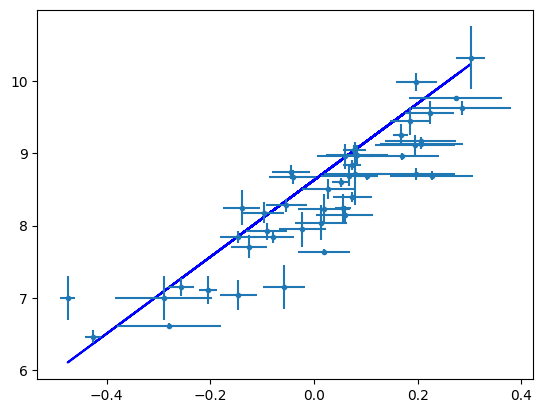

In [184]:
fit=f(log_sigma,3,5.31,3.33)

plt.plot(log_sigma,fit,'b')
plt.errorbar(log_sigma,log_M,xerr=err_log_sigma,yerr=err_logM,fmt='.')

## Problem 3

It is important to develop an idea of the intricacies associated with the information provided
by large surveys in their databases. Here we will estimate the depth of an SDSS image to get a
sense for the uncertainties associated with the photometry that the SDSS database provides. To
that end:

### 1.

Download the r-band SDSS dr7 (data release 7) image centered at coordinates: RA 13:29:52.7,
DEC +47:11:43s. Download a region of 20 × 20 arcmin with a resolution of 0.6 arcseconds
per pixel. The python package astroquery.skyview is recommended for this. Beware that
the file size will be fairly large, it may take a while to download. If your computer has trouble
handling it, download a smaller image and specify in your solution.

First, we will import the libraries, then we will put the coords, the survey and the other parameters requested for the file that we want to download. 

In [46]:
#Importamos las librerias
from astroquery.skyview import SkyView 
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#Observamos lista de surveys contenidos en skyview
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [30]:
#parámetros para descargar la imagen
coords= SkyCoord('13h29m52.7s', '+47d11m43s',frame= 'icrs')
survey= 'SDSSdr7r'
coordinates="ICRS"
resolucion=0.6*u.arcsec
ancho= 20*u.arcmin
largo= 20*u.arcmin

image_addresses= sv.get_images(position=coords,survey=survey,coordinates=coordinates,radius=resolucion,height=largo,width=ancho)
for address in image_addresses:
    print(address)


In [33]:
image_addresses = SkyView.get_image_list(coords, ['SDSSdr7r'],height=largo,width=ancho, 
                                         radius=6*u.arcsec)
for address in image_addresses:
    print(address)

https://skyview.gsfc.nasa.gov/tempspace/fits/skv36556040941979.fits


In [35]:
import urllib

image_filenames = ['SDSS.fits']
urllib.request.urlretrieve(address, fname)


('SDSS.fits', <http.client.HTTPMessage at 0x229a0f963a0>)

We already download the fits, now we gonna see that the file its ok.

In [44]:
#abrimos el fits descargado
from astropy.io import fits
file = fits.open('SDSS.fits')

file.info()

Filename: SDSS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     120   (300, 300)   float32   


We can see the header to see all de information within the file.fits

In [40]:
file[0].header

SIMPLE  =                    T / Written by SkyView Sun Apr 23 19:42:00 EDT 2023
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =               202.47 / Reference longitude                            
CRVAL2  =              47.1953 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

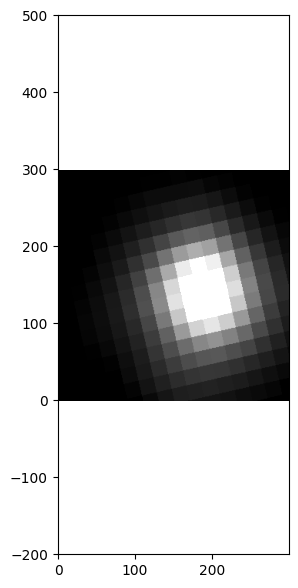

In [204]:
plt.figure(figsize=(7, 7))
plt.imshow(file[0].data, vmin=5000,vmax=15000, origin='lower', cmap='gray')
plt.xlim=(-100,500)
plt.ylim(-200,500)
plt.show()

### 2
We will estimate the depth of the image in 3” diameter apertures. For that, you will have to
place a large number of apertures in random positions of the sky and study the distribution
of the fluxes within those apertures. Avoid the beautiful galaxy in the center (this is the
Whirlpool galaxy). The python package photutils can be useful. Note that the image is not background-subtracted, so, for every aperture you must estimate the local background using
an annulus

To make the apertures in the sky, we will create circular apertures, for this we import SkyCircularAperture. With the header wee see that 

In [146]:
#x, y = np.meshgrid(np.arange(300), np.arange(300))
##Veremos las aperturas
for i in range(N_aperturas):
    current_x= posicion_x[i]
    current_y= posicion_y[i] 
    aperture = CircularAperture((current_x,current_y), r=0.75)
    aperture = CircularAperture((150,150), r=0.75)
    plt.imshow(file[0].data, vmin=5000,vmax=15000, origin='lower', cmap='gray')
    plt.imshow(aperture.to_mask(method='exact').to_image((300,300)), cmap='gray')
    


0.75

In [211]:
from photutils.aperture import SkyCircularAperture
from photutils.aperture import CircularAperture
from astropy.io import fits
from astropy.wcs import WCS

# cargar imagen astronómica y metadatos

data= file[0].data
# crear objeto WCS



#Definimos las posiciones de las aperturas
N_aperturas=100
escala_x=300
escala_y=50
np.random.seed(7)
posicion_x=np.random.rand(N_aperturas)*escala_x
posicion_y=np.random.rand(N_aperturas)*escala_x
position = list(zip(posicion_x, posicion_y))

#20 min de ancho son 300 pixeles, 15 pixeles en un minuto
#cuantos pixeles son 3 segundos de arco?, 60 segundos de arco son 1 min de arco
#luego 3 seg de arco son =3*15/60 = 0.75 pixeles

#Creamos las aperturas circulares
aperture= CircularAperture(position,r=0.75) # radio en pixeles

We already have created the circular apertures, now we will performing aperture photometry, to this we have to substract the data first using circular annulus.

In [218]:
from photutils.aperture import CircularAnnulus
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry

annulus_aperture = CircularAnnulus(position, r_in=1, r_out=2)
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean



In [225]:
#mostramos una tabla con todas las aperturas realizadas
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)
aperture_area=aperture.area
print(' The aperture area is :' + str(aperture_area))

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 22.892487 20.775621     7786.414
  2 233.97564 107.12119    19401.494
  3 131.52277 243.84887    10286.556
  4 217.03955 128.31145    28177.141
  5 293.39685 179.95633    10053.293
  6 161.54876 218.44838    15424.185
  7 150.33614 246.36828    10687.698
  8  21.61534 228.15454    8151.8439
  9 80.531694 2.1429826     8468.163
 10 149.96475 126.07705    24480.272
...       ...       ...          ...
 91 240.14371 32.063023     10829.07
 92 281.73341 110.84577    13032.701
 93 12.196743 69.801329    8435.7051
 94 262.70152 135.32358    14589.907
 95 82.968922 82.895156    10427.546
 96 142.72935 150.54207    23743.372
 97 239.02829 276.78095    9081.3626
 98 215.17267 114.75334    28177.141
 99 44.144272  195.0385    8755.2588
100 197.62448 178.68633    25452.202
Length = 100 rows
 The aperture area is :1.7671458676442586


We have the aperture and the annulus, also, we have computed the local background of each aperture. Now we gonna substract the background. 

In [228]:
total_bkg = bkg_mean * aperture_area
phot_bkgsub = phot_table['aperture_sum'] - total_bkg

#Como no se puede tener flujo negativo, 
phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum total_bkg aperture_sum_bkgsub
       pix       pix                                              
--- --------- --------- ------------ --------- -------------------
  1 22.892487 20.775621     7786.414  7845.735          -59.320943
  2 233.97564 107.12119    19401.494 19401.494       3.6379788e-12
  3 131.52277 243.84887    10286.556 10286.556       1.8189894e-12
  4 217.03955 128.31145    28177.141 28177.141                   0
  5 293.39685 179.95633    10053.293 10436.924           -383.6313
  6 161.54876 218.44838    15424.185 15315.411           108.77384
  7 150.33614 246.36828    10687.698 10687.698                   0
  8  21.61534 228.15454    8151.8439 8151.8439        9.094947e-13
  9 80.531694 2.1429826     8468.163  8468.163                   0
 10 149.96475 126.07705    24480.272 24480.272      -3.6379788e-12
...       ...       ...          ...       ...                 ...
 91 240.14371 32.063023     10829.07  10829.07                

Now, we have the background substracted of the data.

#### 3.
Report the 5σ limiting flux (in whatever units the image is in) for 3 arcsec-diameter apertures.